## 캐글 코리아와 함께하는 2nd ML 대회 - House Price Prediction

***

<span>
  집과 관련된 20여 가지의 변수 데이터를 분석하여 어떤 조건을 가진 집의 가격을 예측하는 모델을 만드는 것을 목표로 하는 대회이다.
</span>

***

## 1. 데이터 훑어보기

***

<span>
  데이터를 전처리 하기 전에, 어떤 데이터가 있는지 확인하고, 데이터간의 상관관계를 탐색해보는 과정을 진행한다.
</span>

***

+ 캐글에서 사용할 House price prediction 데이터 세트의 특징은 다음과 같다.
<br><br>
+ 1. ID : 집을 구분하는 번호
+ 2. date : 집을 구매한 날짜
+ 3. price : 집의 가격(Target variable)
+ 4. bedrooms : 침실의 수
+ 5. bathrooms : 화장실의 수
+ 6. sqft_living : 주거 공간의 평방 피트(면적)
+ 7. sqft_lot : 부지의 평방 피트(면적)
+ 8. floors : 집의 층 수
+ 9. waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
+ 10. view : 집이 얼마나 좋아 보이는지의 정도
+ 11. condition : 집의 전반적인 상태
+ 12. grade : King County grading 시스템 기준으로 매긴 집의 등급
+ 13. sqft_above : 지하실을 제외한 평방 피트(면적)
+ 14. sqft_basement : 지하실의 평방 피트(면적)
+ 15. yr_built : 지어진 년도
+ 16. yr_renovated : 집을 재건축한 년도
+ 17. zipcode : 우편번호
+ 18. lat : 위도
+ 19. long : 경도
+ 20. sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
+ 21. sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

***

<span>
위 특징들을 하나씩 살펴보면서, 실제로 사람들이 부동산의 가치를 산정할 때, 고려하는 항목들을 선별하고자 한다.<br><br>
    <b>부동산 가치 산정에 필요없다고 생각한 것.</b><br>
    1. ID <br>
    ID는 단순히 집의 목록을 나열하는 인덱스 값 이므로, 목적에 맞지 않는 데이터라고 생각했다. <br>
    <br><br>
    18. 위도<br>
    위도 값은 지구상 집의 위도를 구할 수는 있으나, 이것이 집값에 유의미한 영향은 없을것이라 생각했다.<br>
    <br><br>
    19. 경도<br>
    경도 값은 지구상 집의 경도를 구할 수는 있으나, 이것이 집값에 유의미한 영향은 없을것이라 생각했다.<br>
    <br><br>
    </span>
    <span>
    <b>부동산 가치 산정에 필요하다고 생각한 것.</b><br>
    2. 집을 구매한 날짜<br>
    주식에 고점, 저점이라는 말이 있다. 구매한 시기 대비 비싸게 주고 샀는가 싸게 구입한것인가 라는 의미이다.<br>
    이처럼 집 또한 고점과 저점이 있을것이라 생각하여 구매한 날짜도 가치 산정에 의미있는 데이터라 생각했다.<br>
    <br><br>
    3. 집의 가격<br>
    물건을 구매함에 있어서 가격은 고려사항의 최우선 순위이므로 필수 데이터라고 생각한다.<br>
    <br><br>
    4. 침실의 수<br>
    부동산에 있어 방의 개수는 중요하다. 따라서 필수 데이터 목록에 추가했다.<br>
    <br><br>
    5. 화장실의 수<br>
    화장실 개수에 따라 집값이 다르다는 부동산 뉴스를 본 기억이 있다. 때문에 유효 데이터 목록에 추가했다.<br>
    <br><br>
    6. 주거 공간의 명방 면적<br>
    집의 평수는 집값에 매우 큰 영향을 주기 때문에 필수 데이터라고 생각한다<br>
    <br><br>
    7. 부지의 평방 면적<br>
    땅 면적 또한 집값에 매우 큰 영향을 주는 항목이므로 필수 데이터라고 생각한다.<br>
    <br><br>
    8. 집의 층 수<br>
    로얄층, 귀족 층이라는 말이 있다. 이는 집의 층수가 집값을 산정함에 있어 주요한 데이터라는것을 의미한다.<br>
    <br><br>
    9. 집 근방 강의 유무<br>
    한강뷰는 대한민국 사람들의 꿈이다. 한강이 보이는 집은 프리미엄 가격이 붙는다. 때문에 주요 데이터라고 생각한다.<br>
    <br><br>
    10. 집이 좋아보이는 정도<br>
    깨끗한 집은 수요자에게 좋은 인상을 주며, 심리적으로 더러운 집보다 구매할 가능성을 높여준다는 기사도 있다. 때문에 주요 데이터라고 생각한다.<br>
    <br><br>
    11. 집의 전반적인 상태<br>
    집의 상태가 좋지 않으면, 향후 구매자가 유지보수를 해야한다. 때문에 집 상태는 부동산 가격에 선방영되여 책정되므로 주요 데이터라고 생각한다.<br>
    <br><br>
    12. 시스템 기준의 집 등급<br>
    기관이나 단체가 객관적인 기준으로 산정한 등급은 집 가격에 유의미한 영향을 준다고 생각한다. 마치 신용등급처럼. 때문에 주요 데이터라고 생각한다.<br>
    <br><br>
    13. 지하실을 제외한 면적<br>
    지하실은 지하의 단점때문에 지상보다 가격이 낮다. 때문에 지상층만 분류한 데이터는 결정적인 요인은 아니지만 참고하는 서브 데이터로 활용할 수 있다고 생각한다.<br>
    <br><br>
    14. 지하실의 면적<br>
    지상보다 지하가 더 넓거나, 지하를 주로 활용하는 구조물이라면 지하실의 면적이 중요할 수 있다. 때문에, 서브 데이터로 활용할 수 있다고 생각한다.<br>
    15. 지어진 년도<br>
    모든 물건은 제품 수명이 있으며 집 또한 수명이 있다. 때문에 신축은 가격에 프리미엄이 붙으므로 주요 데이터라고 생각한다.<br>
    <br><br>
    16. 집을 재건축한 년도<br>
    집을 재 건축했다는것은 여러 의미가 있다. 집을 허물고 새로 지었거나, 내부 인테리어만 바꾸었거나, 내부 유지보수 공사만 했거나. 이처럼 다양한 변수가<br> 있으나, 결과적으론 이전보다 집의 상태를 개선했다는 의미이므로 집값에 유의미한 영향을 주는 데이터라고 생각한다.<br>
    <br><br>
    17. 우편번호<br>
    우변번호는 즉 집의 주소를 의미한다. 강남과 지방의 집 값이 다르듯, 집 위치에 따라 집값이 다르므로 주요 데이터라고 생각한다.<br>
    <br><br>
    20. 2015년 기준 주거 면적<br>
    재건축을 진행했다면 방의 구조나 면적이 변경되었을 가능성이 있고, 이는 집값에 유의미한 영향을 미치므로 주요 데이터라고 생각한다.<br>
    <br><br>
    21. 2015년 기준 땅 면적<br>
    재건축을 진행했고, 땅 면적이 변했다면 집 증축 또는 축소를 진행했을 가능성이 있고, 이는 집값에 유의미한 영향을 주므로 주요 데이터라고 생각한다.<br>
</span>

***

+ 위 글을 정리하면, ID, 경도, 위도는 집값 예측에 중요하지 않은 정보라 생각하여 제거하고자 한다. 이를 위해 데이터 전처리 과정을 진행한다.

## 2. 데이터 전처리

### 2.1 라이브러리 가져오기

In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import lightgbm as lgb
import missingno as msno
import matplotlib.pyplot as plt

from os.path import join
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

warnings.filterwarnings("ignore")

### 2.2 CSV(엑셀) 데이터 가져오기

In [2]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv')

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

print('train_data의 차원 : {}'.format(train.shape))
print('test_data의 차원 : {}'.format(test.shape))

train_data의 차원 : (15035, 21)
test_data의 차원 : (6468, 20)


### 2.3 데이터 결측치 유무 확인

<AxesSubplot:>

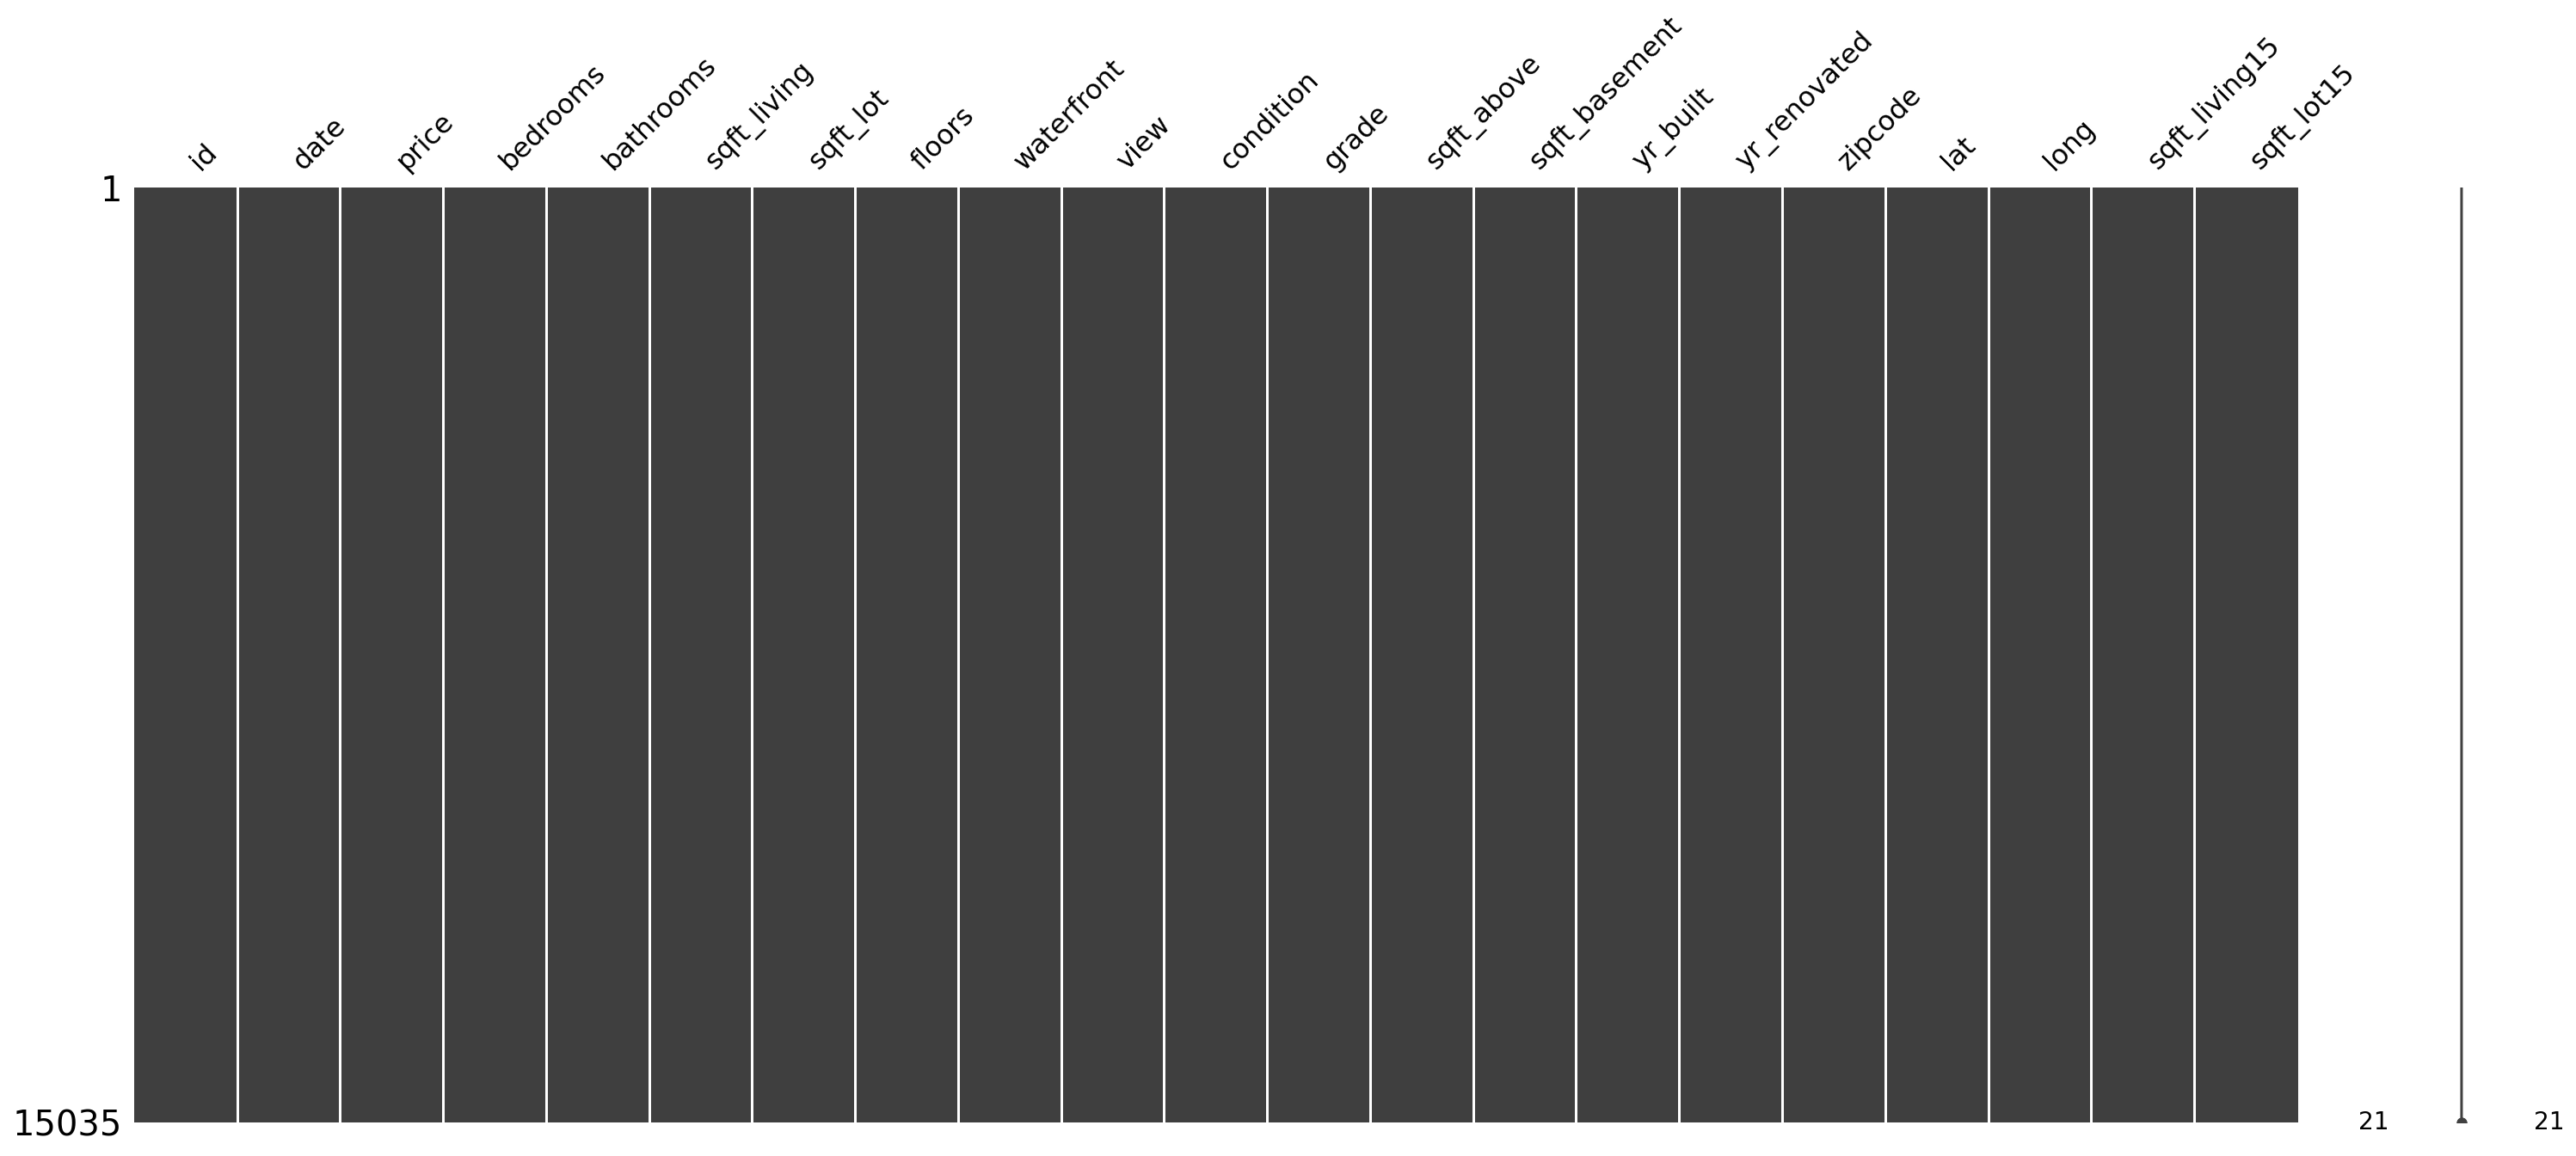

In [3]:
msno.matrix(train)

+ 그림상에는 결측치가 관측되지 않았으나, 만약을 대비하여 수치상으로 결측치를 검사하는 과정을 진행한다.

In [4]:
for c in train.columns:
    print('{} : {}'.format(c, len(train.loc[pd.isnull(train[c]), c].values)))

id : 0
date : 0
price : 0
bedrooms : 0
bathrooms : 0
sqft_living : 0
sqft_lot : 0
floors : 0
waterfront : 0
view : 0
condition : 0
grade : 0
sqft_above : 0
sqft_basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
sqft_living15 : 0
sqft_lot15 : 0


+ 해석적으로도, 수치적으로도 결측치가 관찰 되지 않았다.

### 2.4 학습 데이터에서 label 제거

+ 학습 데이터에는 집 가격 데이터가 있으면 예측이 아닌 정답을 보는 격이 되므로 'price' 특성을 제거해주어야 한다

In [5]:
y = train['price']
del train['price']

In [6]:
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

### 2.5 예측에 불필요한 데이터 제거 및 정규화

+ 데이터를 훑어보는 과정에서 불필요하닥 생각한 데이터와, 수치형 데이터인 구매 날짜 변수(data)를 년도,월 데이터만 가진 범주형 데이터로 정규화하는 과정을 진행한다.
+ 만약을 대비하여 제거하는 데이터는 서브 변수에 별도로 보관한다.

In [7]:
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)

del train['id']
#del train['lat']
#del train['long']

In [8]:
train[:6]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201410,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,201502,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,201502,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,201406,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,201501,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
5,201504,3,2.50,3560,9796,1.0,0,0,3,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925


In [9]:
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

del test['id']
#del test['lat']
#del test['long']

In [10]:
test[:6]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201412,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,201412,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,201405,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,201504,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,201503,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
5,201407,5,2.50,2270,6300,2.0,0,0,3,8,2270,0,1995,0,98092,47.3266,-122.169,2240,7005


## 3. 데이터 시각화

+ 데이터 전처리 과정을 거친 데이터의 분포를 확인해보기 위해 데이터 시각화 및 추가 작업을 진행한다.

In [11]:
data = pd.concat((train, test), axis=0)

In [12]:
data.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201410,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,201502,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,201502,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,201406,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,201501,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


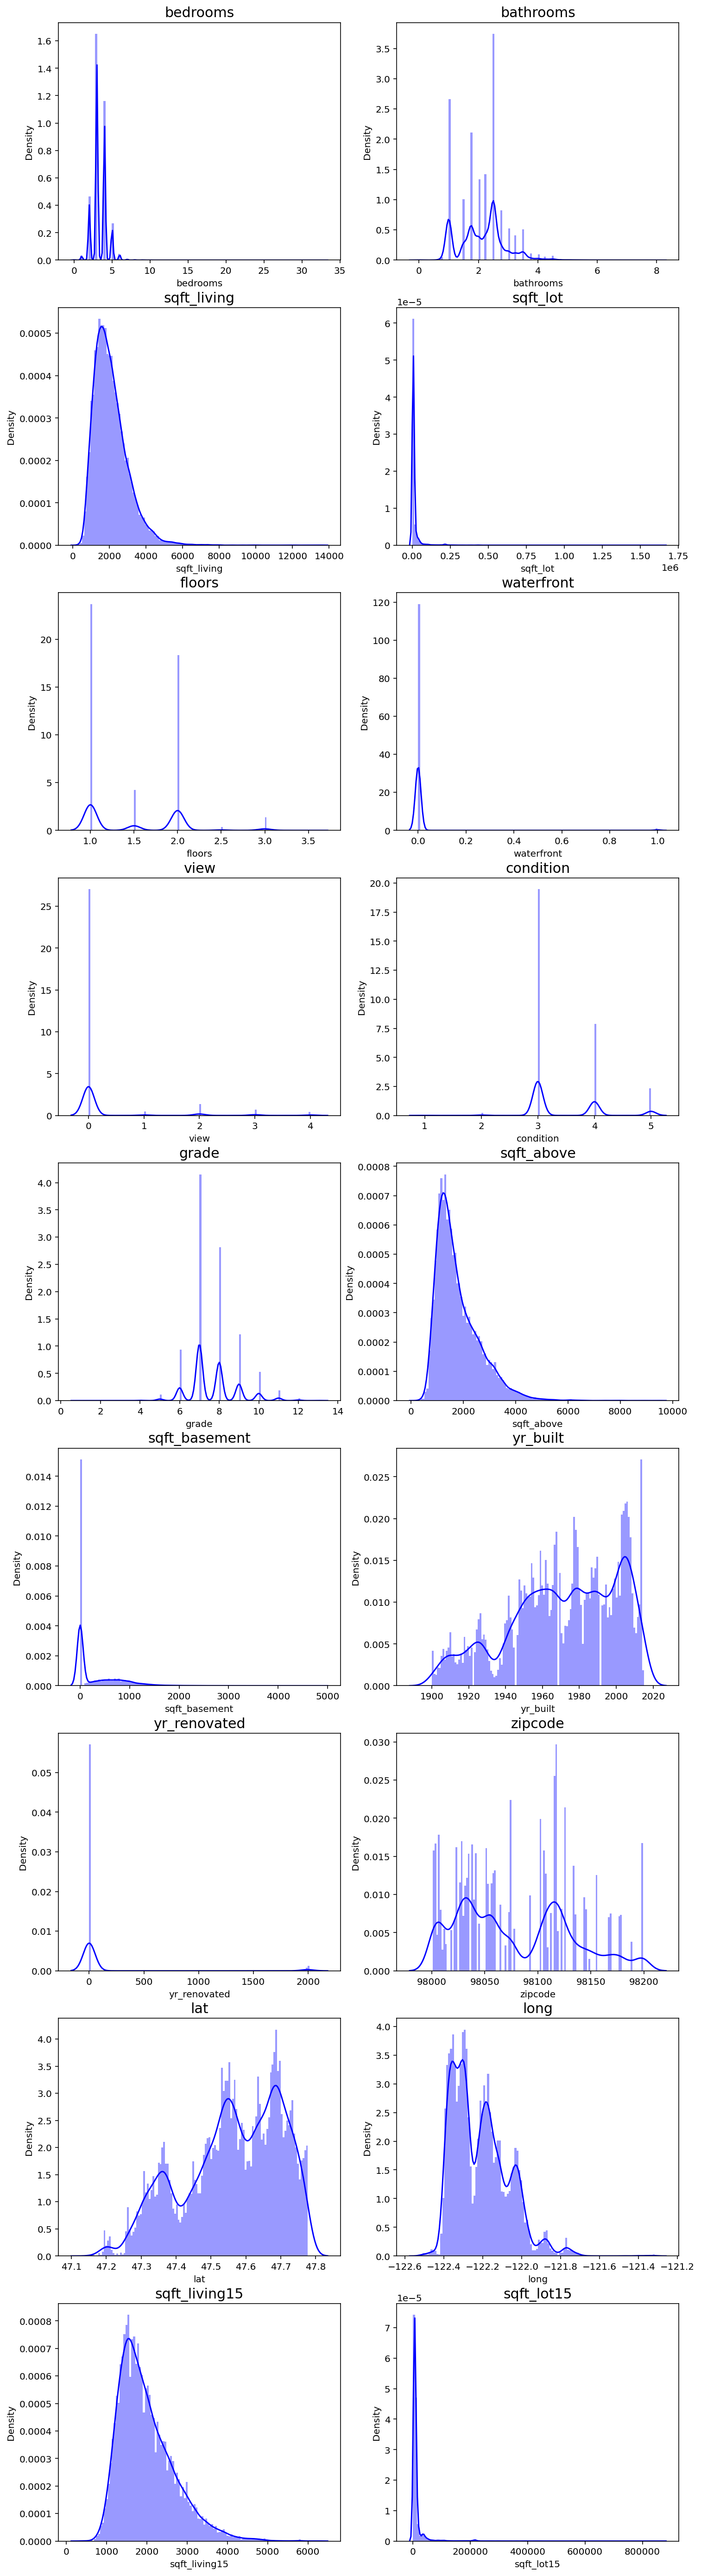

In [13]:
fig, ax = plt.subplots(9, 2, figsize=(12, 50))

count = 1
columns = data.columns
for row in range(9):
    for col in range(2):
        sns.distplot(data[columns[count]], ax=ax[row][col], kde = True, bins = 120 , color = 'blue')
        #sns.kdeplot(preview_data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 17 :
            break

+ 위 그림을 통해 'bathrooms, sqft_living, sqft_lot, waterfront, view, sqft_above, sqft_basement, yr_renovated, sqft_living15, sqft_lot15' 10개의 변수가 왼쪽으로 편향되어 있음을 확인 할 수 있다.
+ 그 중 'bedrooms, sqft_living, sqft_lot, sqft_above, sqft_basement' 변수가 편향의 정도가 심한것을 확인할 수 있다.
+ 편향의 정도가 심한 변수는 log()로 스케일링하여 데이터 분포를 정규분포에 형태로 변환하는 작업을 수행한다.

In [14]:
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

for c in skew_columns:
    data[c] = np.log1p(data[c].values)

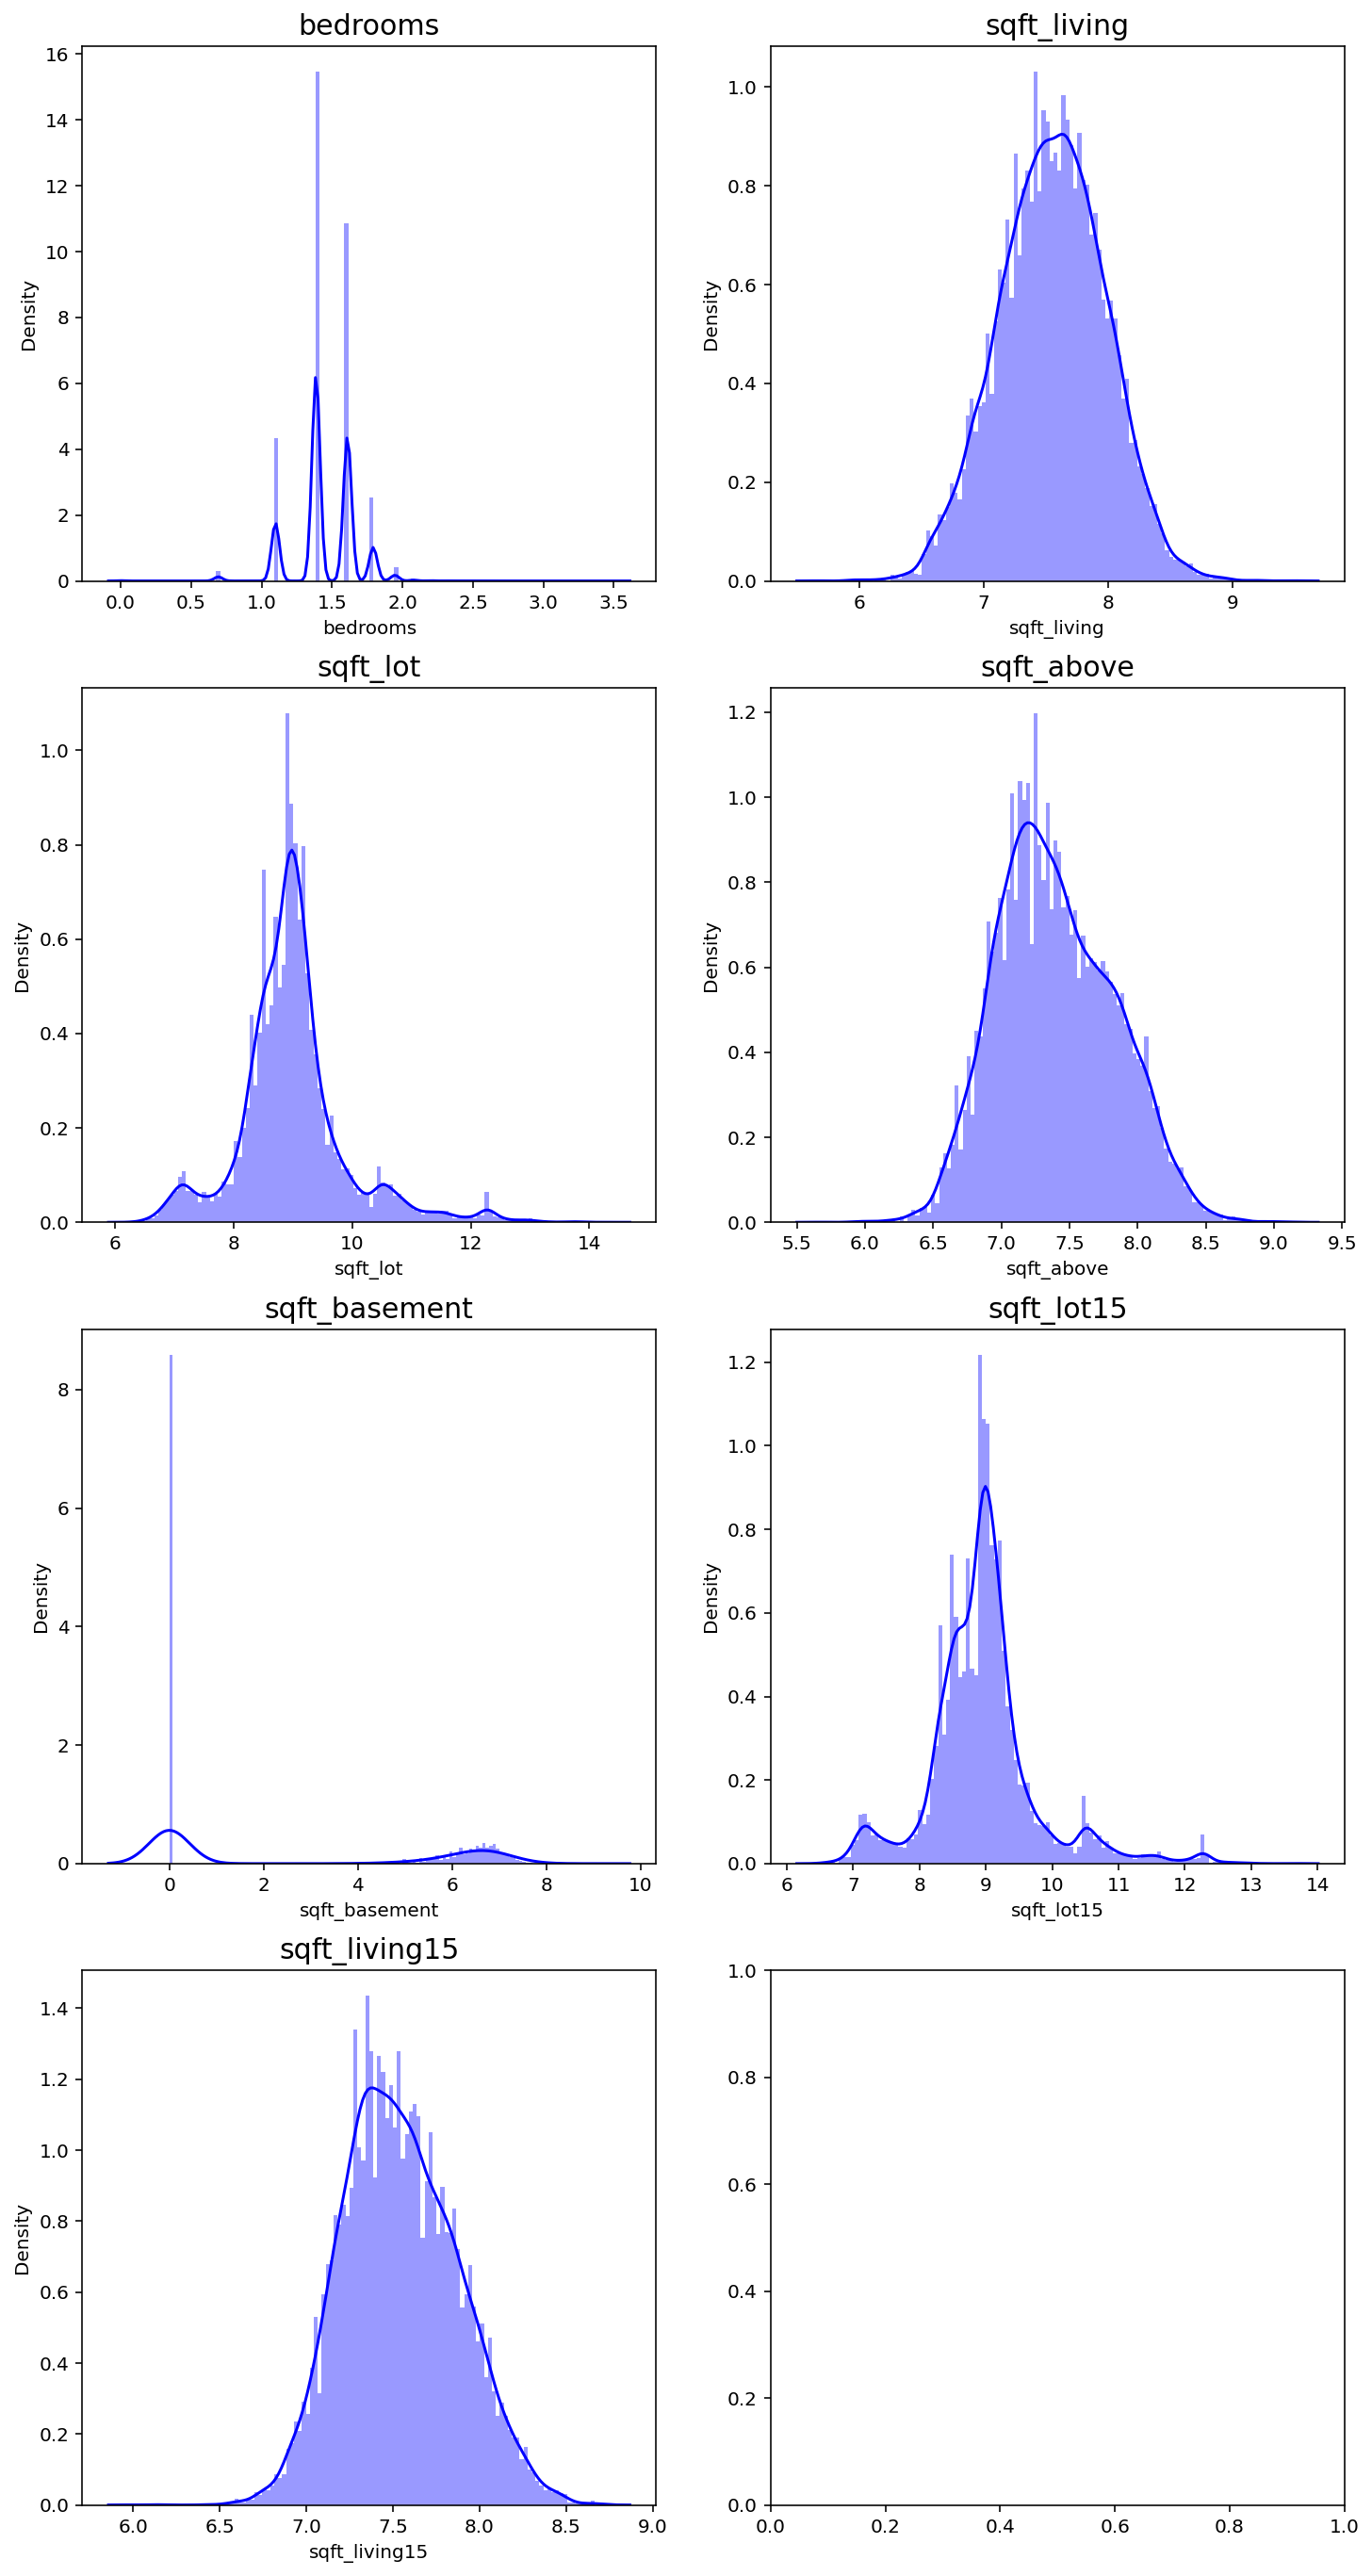

In [15]:
fig, ax = plt.subplots(4, 2, figsize=(12, 24))

count = 0
for row in range(4):
    for col in range(2):
        if count == 7:
            break
        sns.distplot(data[skew_columns[count]], ax=ax[row][col], kde = True, bins = 120 , color = 'blue')
        #sns.kdeplot(preview_data[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count += 1

+ 대체로 정규분포 형태로 잘 되었으나, 'bedroom, sqft_basement'는 정규 분포가 여러개인 형태를 띄고있다.
+ 예측하고자 하는 집값(price)의 분포도도 확인해보는 과정을 진행한다.

<AxesSubplot:xlabel='price', ylabel='Density'>

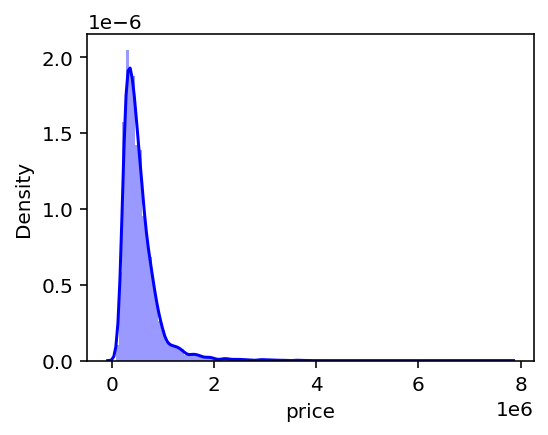

In [16]:
plt.figure(figsize = (4,3))
sns.distplot(y, kde = True, bins = 120 , color = 'blue') # y = train_data['price']

<AxesSubplot:xlabel='price', ylabel='Density'>

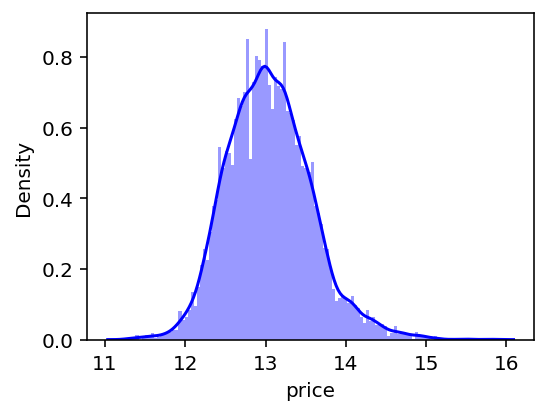

In [17]:
y = np.log1p(y)

plt.figure(figsize = (4,3))
sns.distplot(y, kde = True, bins = 120 , color = 'blue')

+ 집값의 데이터를 log()로 스케일링 하여 정규 분포의 형태로 맵핑하였다.
+ log 변환이 완료된 데이터를 학습용과 테스트용 데이터로 나누어 저장한다.

In [18]:
x = data.iloc[:len(train), :]
sub = data.iloc[len(train):, :]

print(x.shape)
print(sub.shape)

(15035, 19)
(6468, 19)


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

## 4. 모델 설계 및 여러 모델 적용(블렌딩)

+ 집값 예측을 위한 'XGBRegressor, LGBMRegressor, GradientBoostingRegressor, RandomForestRegressor' 총 4개의 알고리듬을 사용하고 캐글 대회의 점수 기준인 평균 제곱근 편차(RMSE)을 구하는 함수를 구현하여 예측 모델을 설계하는 과정을 진행한다.

### 4.1 예측 알고리듬 모델 생성

In [20]:
random_state=1996

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

### 4.2 평균 제곱근 편차(RMSE) 함수 구현

In [21]:
def RMSE(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

### 4.3 각 모델별 RMSE 확인

In [22]:
df = {}

for model in models:
    model_name = model.__class__.__name__

    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    df[model_name] = RMSE(y_test, y_pred)
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)

In [23]:
df

{'GradientBoostingRegressor': 127277.98884495234,
 'XGBRegressor': 109497.5335065017,
 'LGBMRegressor': 111769.60670814718,
 'RandomForestRegressor': 121153.94344003325}

## 5. 최적 하이퍼 파라미터를 위한 그리드 탐색

+ 그리드 탐색을 위한 파라미터를 설정하고 그리드 탐색 과정을 사용자 지정 함수안에 구현하여 모델에 대한 코드 재사용성을 확보하는 과정을 진행한다.
+ 각 모델별 그리드를 수행하고, 앙상블에 사용하기 위해, 평균 제곱근 오차(RMSE)가 낮은 모델을 기준으로 선별한다

### 5.1 Grid 사용자 지정 함수 구현

In [24]:
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=verbose, n_jobs=n_jobs)
    grid_model.fit(train, y)

    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    results = pd.DataFrame(params)
    results['score'] = score
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

### 5.2 Grid 파라미터 설정 및 각 모델의 성능 확인

In [25]:
param_grid = {'n_estimators': [50, 100],'max_depth': [1, 10],}

### 5.2.1 GradientBoostingRegressor 모델 사용

In [26]:
#param_grid = {'n_estimators': [50, 100], 'max_depth': [1, 10], 'learning_rate' : [0.1, 0.01]}
my_GridSearch(gboost, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  20 out of  20 | elapsed:   39.6s finished


,max_depth,n_estimators,score,RMSLE
3,10,100,-0.029438,0.171575
2,10,50,-0.029903,0.172924
1,1,100,-0.055036,0.234597
0,1,50,-0.073253,0.270653


+ GradientBoostingRegressor 모델에서는 파라미터가 max_depth가 10이고 n_estimators가 100일때 가장 낮은 오차를 보여주었다.

### 5.2.2 XGBRegressor 모델

In [27]:
#param_grid = {'max_depth': [10, 20, 30], 'n_estimators': [100, 500, 1000]}
my_GridSearch(xgboost, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  20 out of  20 | elapsed:  5.0min finished


,max_depth,n_estimators,score,RMSLE
2,10,50,-0.030349,0.174210
3,10,100,-0.030470,0.174557
1,1,100,-0.043046,0.207475
0,1,50,-0.048745,0.220782


+ XGBRegressor 모델에서는 파라미터가 max_depth가 10이고 n_estimators가 50일때 가장 낮은 오차를 보여주었다.

### 5.2.3 LGBMRegressor 모델

In [28]:
#param_grid = {'max_depth': [5, 25, 50], 'n_estimators': [100, 500, 1000], 'learning_rate' : [0.1, 0.05]}
my_GridSearch(lightgbm, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  20 out of  20 | elapsed:    2.2s finished


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,max_depth,n_estimators,score,RMSLE
3,10,100,-0.027027,0.164399
2,10,50,-0.029177,0.170814
1,1,100,-0.055020,0.234564
0,1,50,-0.073394,0.270914


+ LGBMRegressor 모델에서는 파라미터가 max_depth가 10이고 n_estimators가 100일때 가장 낮은 오차를 보여주었다.

### 5.2.4 RandomForestRegressor 모델

In [29]:
#param_grid = {'max_depth': [10, 50, 100], 'n_estimators': [100, 300, 500], }
my_GridSearch(rdforest, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  20 out of  20 | elapsed:   25.1s finished


,max_depth,n_estimators,score,RMSLE
3,10,100,-0.035052,0.187222
2,10,50,-0.035258,0.187770
1,1,100,-0.179342,0.423487
0,1,50,-0.179475,0.423645


+ RandomForestRegressor 모델에서는 파라미터가 max_depth가 10이고 n_estimators가 100일때 가장 낮은 오차를 보여주었다.

## 6. 앙상블 함수 구현

+ 가장 낮은 오차를 보여준 XGBRegressor과 LGBMRegressor모델을 활용하여 앙상블을 진행하고자 한다.
+ 집값은 수치로 표현할 수 있는 수치형 데이터 이며, y의 값을 예측하는 것이므로 회귀 문제이다.
+ 따라서, 모델들의 예측 결과의 평균을 최종 결과값으로 하는 블렌딩 모델을 구현하기위해 AveragingBlending()를 활용한다.

In [30]:
def AveragingBlending(models, x, y, sub_x):
    for model in models : 
        model['model'].fit(x.values, y)
    
    predictions = np.column_stack([
        model['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)

## 7. step.1 ~ step.6을 통합한 추상화 함수 구현

In [31]:
def save_submission(model, train, y, test, model_name, rmsle=None):
    predict = AveragingBlending(model, train, y, test)
    predict = np.expm1(predict)
    data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = predict
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} 저장완료!'.format(submission_csv_path))

## 8. 하이퍼 파라미터 설정 및 예측 모델 생성

In [32]:
#xgboost = XGBRegressor(max_depth=10, n_estimators=100, random_state=1996)
#lightgbm = LGBMRegressor(max_depth=5, n_estimators=50, learning_rate=0.04, random_state=1996)

lightgbm = LGBMRegressor(max_depth=100, n_estimators=1000, learning_rate=0.05, random_state=random_state)
gboost = GradientBoostingRegressor(max_depth=5, n_estimators=750, learning_rate=0.05, random_state=random_state)

models = [{'model':xgboost, 'name':'XGBoost'}, {'model':lightgbm, 'name':'LightGBM'}]

In [33]:
save_submission(models, train, y, test, 'EID-20', rmsle=0.17)

/aiffel/aiffel/kaggle_kakr_housing/data/submission_EID-20_RMSLE_0.17.csv 저장완료!


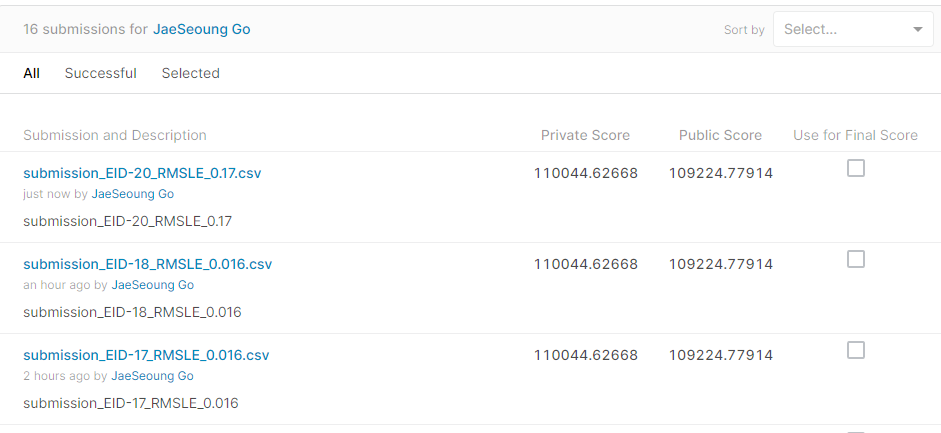

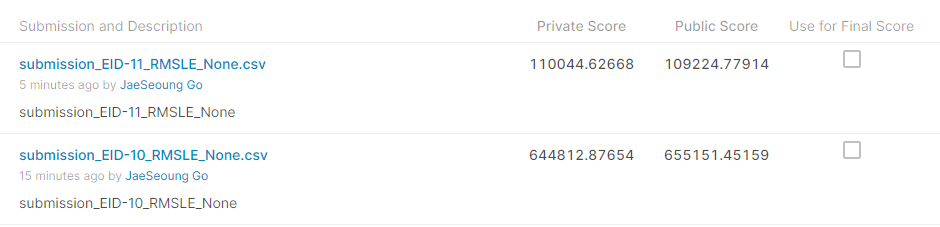

***

<span>
처음에는 위도와 경도가 집값에 무의미한 데이터라고 생각하여 위도,경도,id가 없는 데이터셋을 기반으로 하이퍼 파라미터를 튜닝하며 모델을 만들었다.<br> 그러나, id만 제거했을 떄보다 성능이 더 좋지 않았다. 무려 65만점이나 나오면서 쓸 수 없는 모델이 나왔다. 이는 캐글의 의도에 맞지 않은 모델을 만들었음을 의미한다.<br><br>
그래서, 캐글의 의도에 맞춰 ID만 제거한 후 같은 하이퍼 파라미터로 모델을 생성하자 바로 11만점에 근접한 성능을 나타내는 모델이 생성되었다.<br>
필자는 캐글의 집값 예측기는 한 나라가 아닌 전세계를 대상으로 하기에 위도,경도의 데이터가 있어서 그런게 아닌가 하는 생각이 들었다.<br>
이번 경험을 계기로 feature의 유무가 모델 성능에 큰 영향을 준다는것을 경험했다.<br>
</span>

***